In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating a dense neural network


# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes
#Building the structure 
  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality
#Getting Output
  def call(self, x):
    z = tf.matmul(x, self.W) + self.b
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)
print(y.numpy())

[[0.26978594 0.45750415 0.66536945]]


In [3]:

### Sequential Model ###

#we can use direct terms insted of always writing tf.keras.Sequential everytime :)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3
# First define the model 
model = Sequential()
dense_layer = Dense(n_output_nodes, activation='sigmoid') # TODO
model.add(dense_layer)
x = tf.ones((1,4))
y = model(x)
model.weights
model.summary
y.numpy()


array([[0.38367963, 0.6882663 , 0.20765465]], dtype=float32)

In [4]:
#subclassing - we can call and make a layer using single class gives lot of flexibility to models
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    
    self.dense_layer = Sequential(
    [
        Dense(2, activation="relu"),
        Dense(3, activation="relu"),
        Dense(4),
    ])
  def call(self, inputs):
    return self.dense_layer(inputs)


In [5]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input).numpy())

[[-0.20354457  0.31522542 -0.20333627 -0.11611956]]


In [6]:
#optimisation

x = tf.Variable(2.0)

with tf.GradientTape() as tape:
  y = x**2  
dy_dx = tape.gradient(y, x) 
x = tf.Variable(2.0)
dy_dx.numpy()

4.0

Initializing x=[[-0.00839665]]


Text(0, 0.5, 'x value')

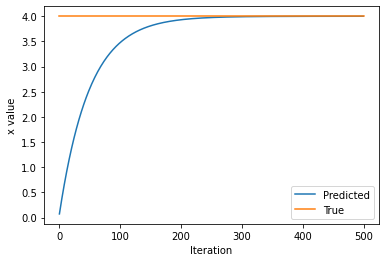

In [7]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
  
    loss = (x - x_f)**2 # "forward pass": record the current loss on the tape

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')